In [1]:
import numpy as np
import pandas as pd

In [4]:
customer_data=pd.read_csv("Customer_Behaviour.csv")

In [5]:
customer_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Dataset info

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data encoding

In [7]:
customer_data["Male"] = pd.get_dummies(customer_data["Gender"])["Male"]

In [8]:
customer_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


# Dropping Gender and UserID

In [9]:
for col in ["Gender", "User ID"]:
  customer_data.drop(col, axis=1, inplace=True)

In [10]:
customer_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

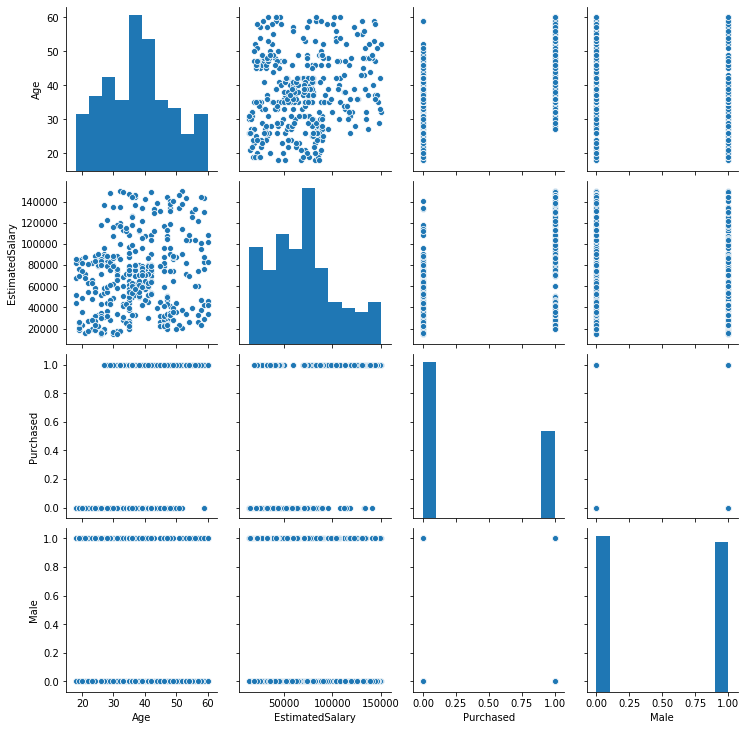

In [12]:
sns.pairplot(customer_data)

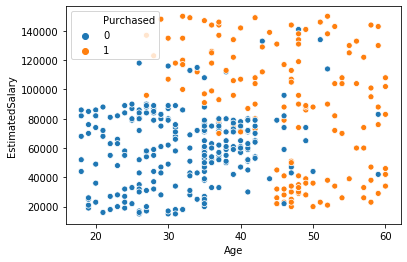

In [14]:
sns.scatterplot(customer_data["Age"], customer_data["EstimatedSalary"], hue=customer_data["Purchased"])

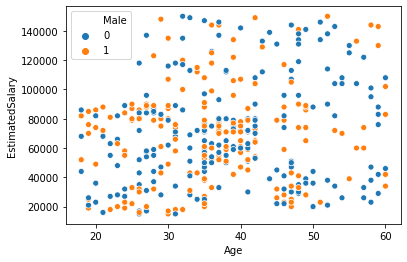

In [15]:
sns.scatterplot(customer_data["Age"], customer_data["EstimatedSalary"], hue=customer_data["Male"])

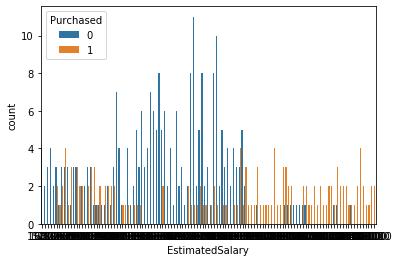

In [16]:
sns.countplot(customer_data["EstimatedSalary"], hue=customer_data["Purchased"])

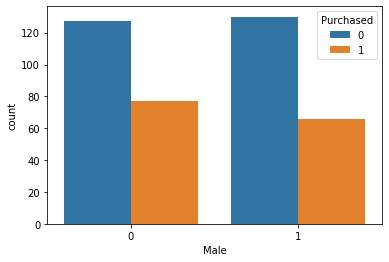

In [17]:
sns.countplot(customer_data["Male"], hue=customer_data["Purchased"])

# Splitting data for test and train

In [18]:
X = customer_data.drop("Purchased", axis=1).values
y = customer_data["Purchased"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Performance Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

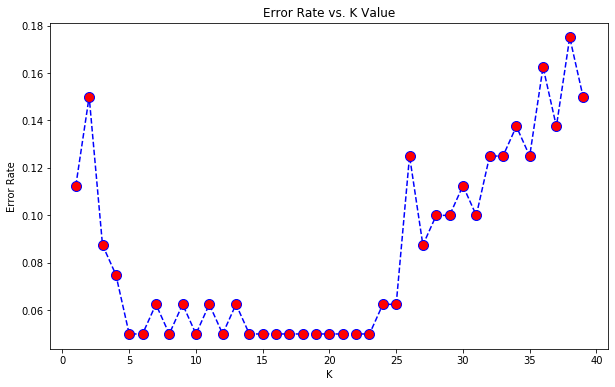

In [23]:
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

evaluate_model_performance(y_test, y_pred)

0.95
[[47  0]
 [ 4 29]]


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.5875
[[47  0]
 [33  0]]


# Decesion Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.875
[[44  3]
 [ 7 26]]


# Random Forest Classification

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.9
[[46  1]
 [ 7 26]]


# Conclusion

KNN classifier is the best model that can be used as it gives the highest accuracy,i.e. 0.95(95%).